# 一、前期工作

大家好，我是『K同学啊』！

之前写了一篇名为 **[「多图」图解10大CNN架构](https://mtyjkh.blog.csdn.net/article/details/119616747)** 的文章后，发现有些模型在我们的《深度学习100例》中并未介绍，后来不是说填坑嘛，之前已经写一篇 **[深度学习100例-卷积神经网络（LeNet-5）深度学习里的“Hello Word” | 第22天](https://mtyjkh.blog.csdn.net/article/details/119700804)** 来填补`LeNet-5`的坑。今天继续写**一篇关于`Xception`模型的实例，实现了四种动物（狗、猫、鸡、马）的识别分类**。希望大家多多支持，**点赞**、**收藏**、**评论**。

本文的重点是：
- Xception模型的搭建
- 深度可分离卷积

🔥本文 GitHub [https://github.com/kzbkzb/Python-AI](https://github.com/kzbkzb/Python-AI) 已收录

- 作者：[K同学啊](https://mp.weixin.qq.com/s/NES9RhtAhbX_jsmGua28dA)
- 来自专栏：《深度学习100例》-Tensorflow2版本
- 数据链接：https://pan.baidu.com/s/1eiJgSOG4KAxlqwtU9kFvIA （提取码：1dfi）

🚀我的环境：

- 语言环境：Python3.6.5
- 编译器：jupyter notebook
- 深度学习环境：TensorFlow2.4.1
- 显卡（GPU）：NVIDIA GeForce RTX 3080

**🚀 本文选自专栏：[《深度学习100例》](https://blog.csdn.net/qq_38251616/category_11068756.html)**

🚀 **深度学习新人必看：[《小白入门深度学习》](https://blog.csdn.net/qq_38251616/category_11188161.html)**

1. [小白入门深度学习 | 第一篇：配置深度学习环境](https://mtyjkh.blog.csdn.net/article/details/118575238)
2. [小白入门深度学习 | 第二篇：编译器的使用-Jupyter Notebook](https://mtyjkh.blog.csdn.net/article/details/118814364)
3. [小白入门深度学习 | 第三篇：深度学习初体验](https://mtyjkh.blog.csdn.net/article/details/119081309)
4. [小白入门深度学习 | 第四篇：配置PyTorch环境](https://blog.csdn.net/qq_38251616/article/details/119969393)

🚀 往期精彩-卷积神经网络篇：

1. [深度学习100例-卷积神经网络（CNN）实现mnist手写数字识别 | 第1天](https://mtyjkh.blog.csdn.net/article/details/116920825) 
2. [深度学习100例-卷积神经网络（CNN）彩色图片分类 | 第2天](https://mtyjkh.blog.csdn.net/article/details/116978213)
3. [深度学习100例-卷积神经网络（CNN）服装图像分类 | 第3天](https://mtyjkh.blog.csdn.net/article/details/116992196)
4. [深度学习100例-卷积神经网络（CNN）花朵识别 | 第4天](https://mtyjkh.blog.csdn.net/article/details/117079919)
5. [深度学习100例-卷积神经网络（CNN）天气识别 | 第5天](https://mtyjkh.blog.csdn.net/article/details/117186183)
6. [深度学习100例-卷积神经网络（VGG-16）识别海贼王草帽一伙 | 第6天](https://mtyjkh.blog.csdn.net/article/details/117331631)
7. [深度学习100例-卷积神经网络（VGG-19）识别灵笼中的人物 | 第7天](https://mtyjkh.blog.csdn.net/article/details/117395797)
8. [深度学习100例-卷积神经网络（ResNet-50）鸟类识别 | 第8天](https://mtyjkh.blog.csdn.net/article/details/117587326)
9. [深度学习100例-卷积神经网络（AlexNet）手把手教学 | 第11天](https://mtyjkh.blog.csdn.net/article/details/117986183)
10. [深度学习100例-卷积神经网络（CNN）识别验证码 | 第12天](https://mtyjkh.blog.csdn.net/article/details/118211253)
11. [深度学习100例-卷积神经网络（Inception V3）识别手语 | 第13天](https://mtyjkh.blog.csdn.net/article/details/118310170)
12. [深度学习100例-卷积神经网络（Inception-ResNet-v2）识别交通标志 | 第14天](https://mtyjkh.blog.csdn.net/article/details/118389790)
13. [深度学习100例-卷积神经网络（CNN）实现车牌识别 | 第15天](https://mtyjkh.blog.csdn.net/article/details/118422302)
14. [深度学习100例-卷积神经网络（CNN）识别神奇宝贝小智一伙 | 第16天](https://mtyjkh.blog.csdn.net/article/details/118631541)
15. [深度学习100例-卷积神经网络（CNN）注意力检测 | 第17天](https://mtyjkh.blog.csdn.net/article/details/118938811)
16. [深度学习100例-卷积神经网络（VGG-16）猫狗识别 | 第21天](https://mtyjkh.blog.csdn.net/article/details/119531838)
17. [深度学习100例-卷积神经网络（LeNet-5）深度学习里的“Hello Word” | 第22天](https://mtyjkh.blog.csdn.net/article/details/119700804)
18. [深度学习100例-卷积神经网络（CNN）3D医疗影像识别 | 第23天](https://blog.csdn.net/qq_38251616/article/details/119899570)

🚀 往期精彩-循环神经网络篇：

1. [深度学习100例-循环神经网络（RNN）实现股票预测 | 第9天](https://mtyjkh.blog.csdn.net/article/details/117752046)
2. [深度学习100例-循环神经网络（LSTM）实现股票预测 | 第10天](https://mtyjkh.blog.csdn.net/article/details/117907074)

🚀 往期精彩-生成对抗网络篇：

1. [深度学习100例-生成对抗网络（GAN）手写数字生成 | 第18天](https://mtyjkh.blog.csdn.net/article/details/118995896)
2. [深度学习100例-生成对抗网络（DCGAN）手写数字生成 | 第19天](https://mtyjkh.blog.csdn.net/article/details/119133575)
3. [深度学习100例-生成对抗网络（DCGAN）生成动漫小姐姐 | 第20天](https://mtyjkh.blog.csdn.net/article/details/119182578)

## 1. 设置GPU

如果使用的是CPU可以注释掉这部分的代码。

In [1]:
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")

if gpus:
    tf.config.experimental.set_memory_growth(gpus[0], True)  #设置GPU显存用量按需使用
    tf.config.set_visible_devices([gpus[0]],"GPU")
    
# 打印显卡信息，确认GPU可用
print(gpus)import tensorflow as tf

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## 2. 导入数据

In [2]:
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

import os,PIL

# 设置随机种子尽可能使结果可以重现
import numpy as np
np.random.seed(1)

# 设置随机种子尽可能使结果可以重现
import tensorflow as tf
tf.random.set_seed(1)

import pathlib

In [3]:
data_dir = "./data"

data_dir = pathlib.Path(data_dir)

## 3. 查看数据

In [4]:
image_count = len(list(data_dir.glob('*/*')))

print("图片总数为：",image_count)

图片总数为： 4000


# 二、数据预处理

## 1. 加载数据

使用`image_dataset_from_directory`方法将磁盘中的数据加载到`tf.data.Dataset`中

In [5]:
batch_size = 2
img_height = 299
img_width  = 299

TensorFlow版本是2.2.0的同学可能会遇到`module 'tensorflow.keras.preprocessing' has no attribute 'image_dataset_from_directory'`的报错，升级一下TensorFlow就OK了。

In [6]:
"""
关于image_dataset_from_directory()的详细介绍可以参考文章：https://mtyjkh.blog.csdn.net/article/details/117018789
"""
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=12,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 4000 files belonging to 4 classes.
Using 3200 files for training.


In [7]:
"""
关于image_dataset_from_directory()的详细介绍可以参考文章：https://mtyjkh.blog.csdn.net/article/details/117018789
"""
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=12,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 4000 files belonging to 4 classes.
Using 800 files for validation.


我们可以通过class_names输出数据集的标签。标签将按字母顺序对应于目录名称。

In [8]:
class_names = train_ds.class_names
print(class_names)

['cat', 'chook', 'dog', 'horse']


## 3. 再次检查数据 

In [9]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(2, 299, 299, 3)
(2,)


- `Image_batch`是形状的张量（2, 299, 299, 3)。这是一批形状240x240x3的8张图片（最后一维指的是彩色通道RGB）。 
- `Label_batch`是形状（8，）的张量，这些标签对应8张图片

## 4. 配置数据集

- **shuffle()** ： 打乱数据，关于此函数的详细介绍可以参考：https://zhuanlan.zhihu.com/p/42417456
- **prefetch()** ：预取数据，加速运行，其详细介绍可以参考我前两篇文章，里面都有讲解。
- **cache()** ：将数据集缓存到内存当中，加速运行

In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = (
    train_ds.cache()
    .shuffle(1000)
#     .map(train_preprocessing)    # 这里可以设置预处理函数
#     .batch(batch_size)           # 在image_dataset_from_directory处已经设置了batch_size
    .prefetch(buffer_size=AUTOTUNE)
)

val_ds = (
    val_ds.cache()
    .shuffle(1000)
#     .map(val_preprocessing)    # 这里可以设置预处理函数
#     .batch(batch_size)         # 在image_dataset_from_directory处已经设置了batch_size
    .prefetch(buffer_size=AUTOTUNE)
)

# 三、构建模型

`Xception`是谷歌公司继`Inception`后，提出的`InceptionV3`的一种改进模型，其中`Inception`模块已被深度可分离卷积（depthwise separable convolution）替换。它与`Inception-v1`（23M）的参数数量大致相同。

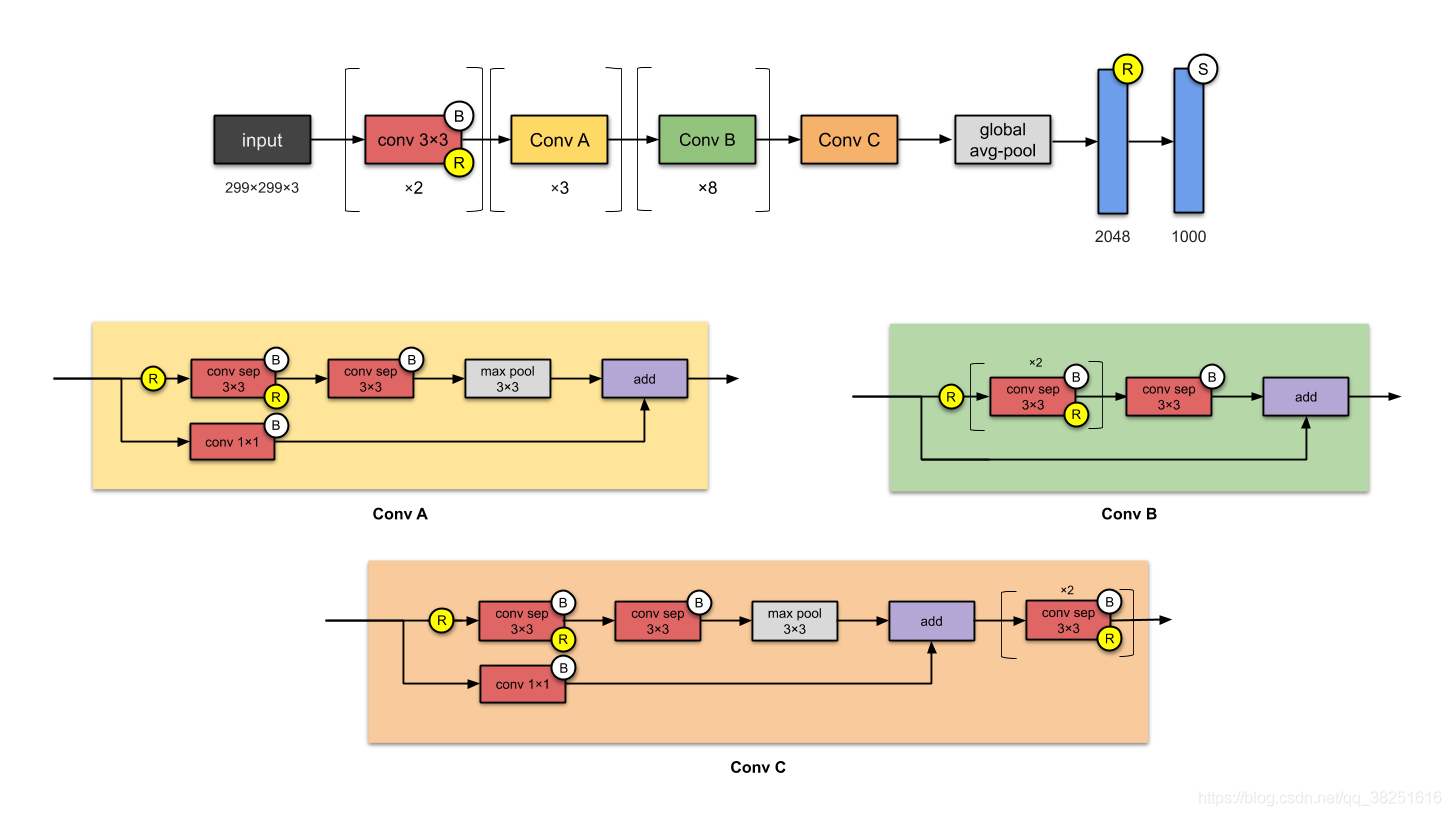

## 1. 深度可分离卷积

**深度可分离卷积其实是一种可分解卷积操作（factorized convolutions）。其可以分解为两个更小的操作：depthwise  convolution 和 pointwise convolution。**

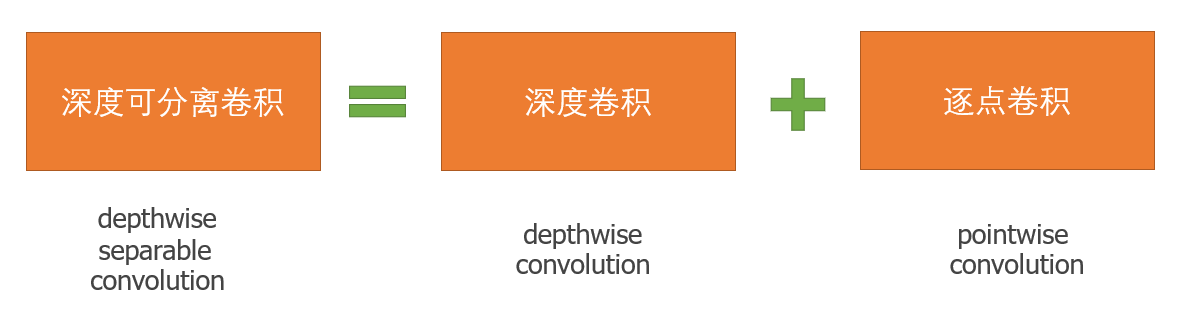

**（1）标准卷积**

下面先学习标准的卷积操作：

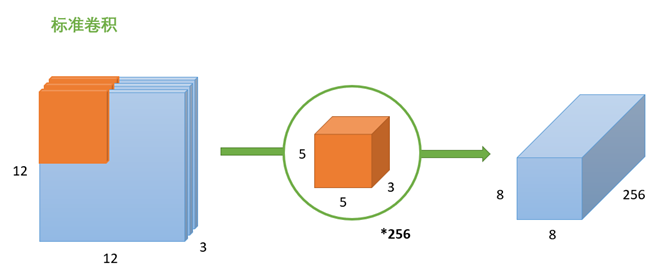

输入一个12*12*3的一个输入特征图，经过 5*5*3的卷积核得到一个8*8*1的输出特征图。如果我们此时有256个卷积核，我们将会得到一个8*8*256的输出特征图。

以上就是标准卷积做的活，那么深度卷积和逐点卷积呢？

**（2）深度卷积**

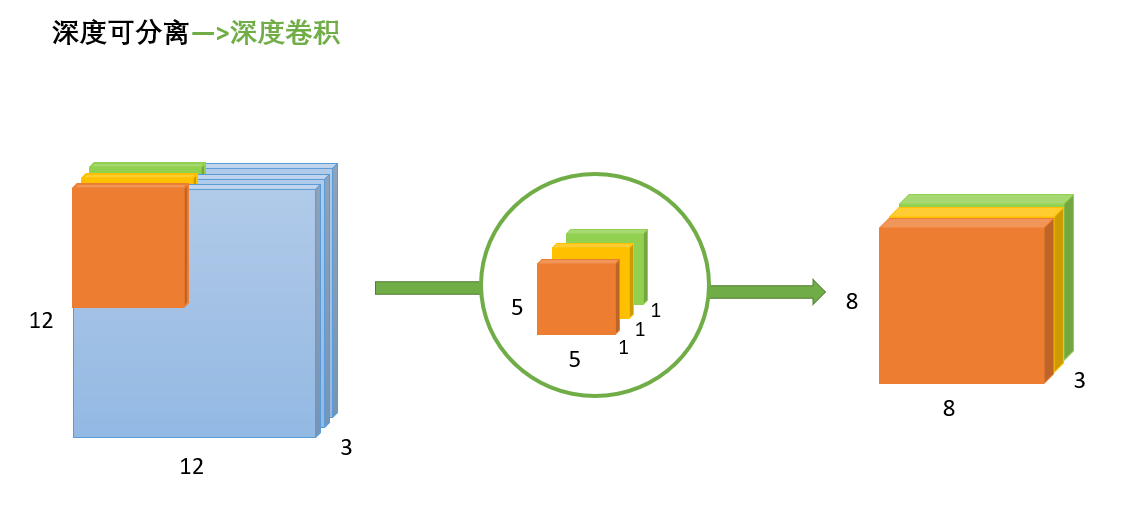

与标准卷积网络不一样的是，这里会将卷积核拆分成单通道形式，在不改变输入特征图像的深度的情况下，对每一通道进行卷积操作，这样就得到了和输入特征图通道数一致的输出特征图。如上图，输入12*12*3 的特征图，经过5*5*1*3的深度卷积之后，得到了8*8*3的输出特征图。输入和输出的维度是不变的3，这样就会有一个问题，通道数太少，特征图的维度太少，能获得足够的有效信息吗?

**(3)逐点卷积**

逐点卷积就是1*1卷积，主要作用就是对特征图进行升维和降维，如下图：

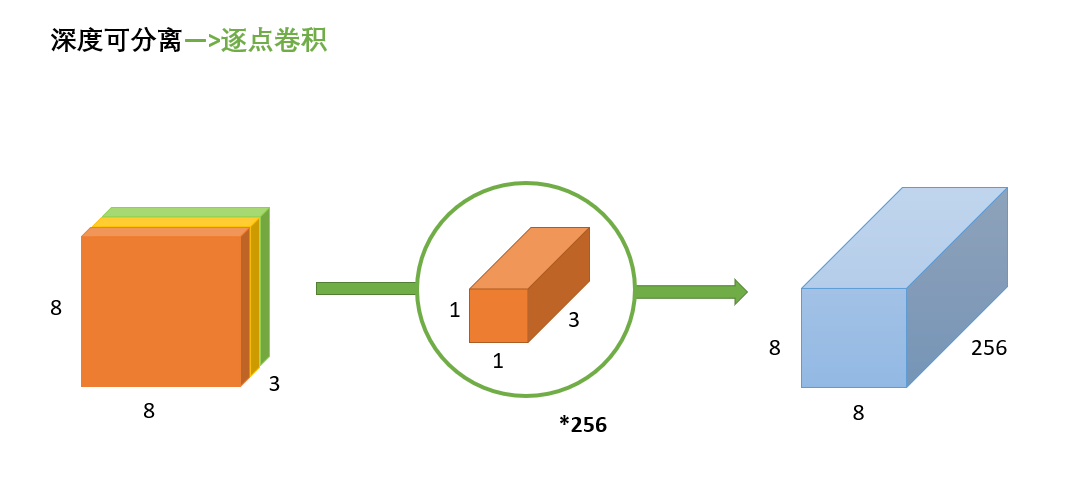

在深度卷积的过程中，我们得到了8*8*3的输出特征图，我们用256个1*1*3的卷积核对输入特征图进行卷积操作，输出的特征图和标准的卷积操作一样都是8*8*256了。

标准卷积与深度可分离卷积的过程对比如下：

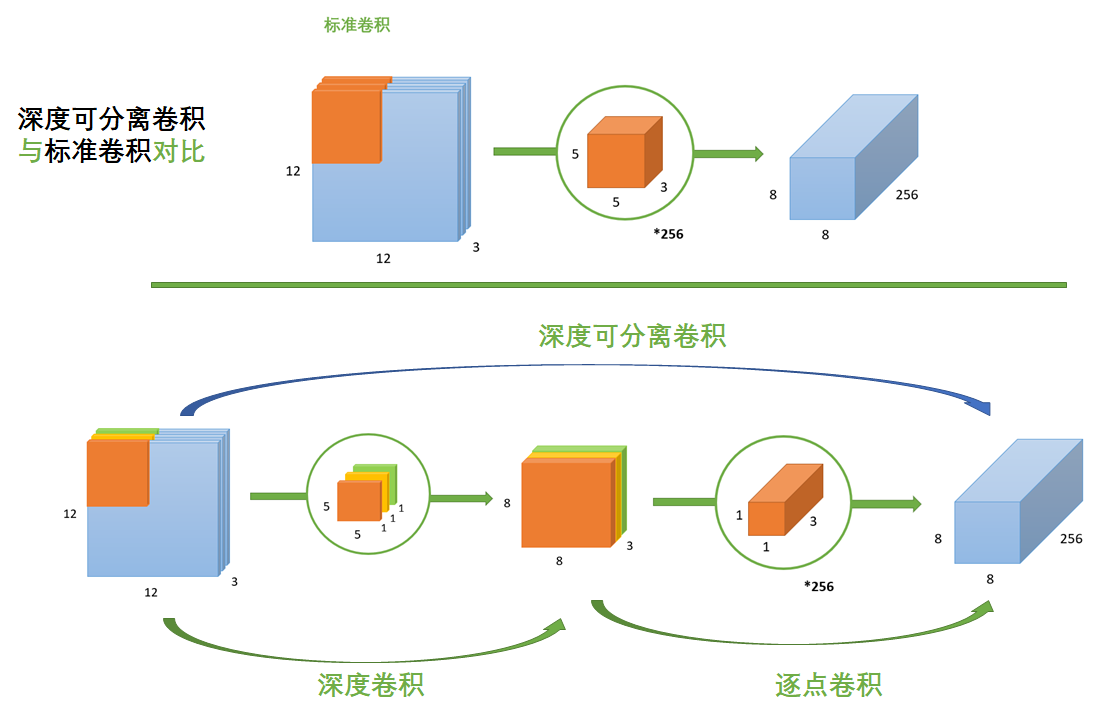

**(4)为什么要用深度可分离卷积？**

深度可分离卷积可以实现更少的参数，更少的运算量。

## 2. 构建Xception模型

In [11]:
#====================================#
#     Xception的网络部分
#====================================#
from tensorflow.keras.preprocessing import image

from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Input,BatchNormalization,Activation,Conv2D,SeparableConv2D,MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D,GlobalMaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.applications.imagenet_utils import decode_predictions


def Xception(input_shape = [299,299,3],classes=1000):

    img_input = Input(shape=input_shape)
    
    #=================#
    #   Entry flow
    #=================#
    #  block1
    # 299,299,3 -> 149,149,64
    x = Conv2D(32, (3, 3), strides=(2, 2), use_bias=False, name='block1_conv1')(img_input)
    x = BatchNormalization(name='block1_conv1_bn')(x)
    x = Activation('relu', name='block1_conv1_act')(x)
    x = Conv2D(64, (3, 3), use_bias=False, name='block1_conv2')(x)
    x = BatchNormalization(name='block1_conv2_bn')(x)
    x = Activation('relu', name='block1_conv2_act')(x)


    # block2
    # 149,149,64 -> 75,75,128
    residual = Conv2D(128, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = SeparableConv2D(128, (3, 3), padding='same', use_bias=False, name='block2_sepconv1')(x)
    x = BatchNormalization(name='block2_sepconv1_bn')(x)
    x = Activation('relu', name='block2_sepconv2_act')(x)
    x = SeparableConv2D(128, (3, 3), padding='same', use_bias=False, name='block2_sepconv2')(x)
    x = BatchNormalization(name='block2_sepconv2_bn')(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same', name='block2_pool')(x)
    x = layers.add([x, residual])

    # block3
    # 75,75,128 -> 38,38,256
    residual = Conv2D(256, (1, 1), strides=(2, 2),padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = Activation('relu', name='block3_sepconv1_act')(x)
    x = SeparableConv2D(256, (3, 3), padding='same', use_bias=False, name='block3_sepconv1')(x)
    x = BatchNormalization(name='block3_sepconv1_bn')(x)
    x = Activation('relu', name='block3_sepconv2_act')(x)
    x = SeparableConv2D(256, (3, 3), padding='same', use_bias=False, name='block3_sepconv2')(x)
    x = BatchNormalization(name='block3_sepconv2_bn')(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same', name='block3_pool')(x)
    x = layers.add([x, residual])

    # block4
    # 38,38,256 -> 19,19,728
    residual = Conv2D(728, (1, 1), strides=(2, 2),padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = Activation('relu', name='block4_sepconv1_act')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False, name='block4_sepconv1')(x)
    x = BatchNormalization(name='block4_sepconv1_bn')(x)
    x = Activation('relu', name='block4_sepconv2_act')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False, name='block4_sepconv2')(x)
    x = BatchNormalization(name='block4_sepconv2_bn')(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same', name='block4_pool')(x)
    x = layers.add([x, residual])

    #=================#
    # Middle flow
    #=================#
    # block5--block12
    # 19,19,728 -> 19,19,728
    for i in range(8):
        residual = x
        prefix = 'block' + str(i + 5)

        x = Activation('relu', name=prefix + '_sepconv1_act')(x)
        x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False, name=prefix + '_sepconv1')(x)
        x = BatchNormalization(name=prefix + '_sepconv1_bn')(x)
        x = Activation('relu', name=prefix + '_sepconv2_act')(x)
        x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False, name=prefix + '_sepconv2')(x)
        x = BatchNormalization(name=prefix + '_sepconv2_bn')(x)
        x = Activation('relu', name=prefix + '_sepconv3_act')(x)
        x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False, name=prefix + '_sepconv3')(x)
        x = BatchNormalization(name=prefix + '_sepconv3_bn')(x)

        x = layers.add([x, residual])

    #=================#
    #    Exit flow
    #=================#
    # block13
    # 19,19,728 -> 10,10,1024
    residual = Conv2D(1024, (1, 1), strides=(2, 2),
                      padding='same', use_bias=False)(x)
    residual = BatchNormalization()(residual)

    x = Activation('relu', name='block13_sepconv1_act')(x)
    x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False, name='block13_sepconv1')(x)
    x = BatchNormalization(name='block13_sepconv1_bn')(x)
    x = Activation('relu', name='block13_sepconv2_act')(x)
    x = SeparableConv2D(1024, (3, 3), padding='same', use_bias=False, name='block13_sepconv2')(x)
    x = BatchNormalization(name='block13_sepconv2_bn')(x)

    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same', name='block13_pool')(x)
    x = layers.add([x, residual])

    # block14
    # 10,10,1024 -> 10,10,2048
    x = SeparableConv2D(1536, (3, 3), padding='same', use_bias=False, name='block14_sepconv1')(x)
    x = BatchNormalization(name='block14_sepconv1_bn')(x)
    x = Activation('relu', name='block14_sepconv1_act')(x)

    x = SeparableConv2D(2048, (3, 3), padding='same', use_bias=False, name='block14_sepconv2')(x)
    x = BatchNormalization(name='block14_sepconv2_bn')(x)
    x = Activation('relu', name='block14_sepconv2_act')(x)

    x = GlobalAveragePooling2D(name='avg_pool')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)

    inputs = img_input

    model = Model(inputs, x, name='xception')

    return model

In [12]:
model = Xception()
# 打印模型信息
model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

# 四、设置动态学习率

这里先罗列一下学习率大与学习率小的优缺点。

- 学习率大
    - 优点：
        1、加快学习速率。
        2、有助于跳出局部最优值。
    - 缺点：
        1、导致模型训练不收敛。
        2、单单使用大学习率容易导致模型不精确。

- 学习率小
    - 优点：
        1、有助于模型收敛、模型细化。
        2、提高模型精度。
    - 缺点：
        1、很难跳出局部最优值。
        2、收敛缓慢。

注意：这里设置的动态学习率为：指数衰减型（ExponentialDecay）。在每一个epoch开始前，学习率（learning_rate）都将会重置为初始学习率（initial_learning_rate），然后再重新开始衰减。计算公式如下：

>learning_rate = initial_learning_rate * decay_rate ^ (step / decay_steps)

In [13]:
# 设置初始学习率
initial_learning_rate = 1e-4

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate, 
        decay_steps=300,      # 敲黑板！！！这里是指 steps，不是指epochs
        decay_rate=0.96,     # lr经过一次衰减就会变成 decay_rate*lr
        staircase=True)

# 将指数衰减学习率送入优化器
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# 五、编译

在准备对模型进行训练之前，还需要再对其进行一些设置。以下内容是在模型的编译步骤中添加的：

- 优化器（optimizer）：决定模型如何根据其看到的数据和自身的损失函数进行更新。
- 损失函数（loss）：用于估量预测值与真实值的不一致程度。
- 评价函数（metrics）：用于监控训练和测试步骤。以下示例使用了准确率，即被正确分类的图像的比率。

In [14]:
model.compile(optimizer=optimizer,
              loss     ='sparse_categorical_crossentropy',
              metrics  =['accuracy'])

# 六、训练模型

In [15]:
epochs = 15

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/15
1600/1600 [==============================] - 90s 52ms/step - loss: 1.4092 - accuracy: 0.4022 - val_loss: 1.6745 - val_accuracy: 0.4575
Epoch 2/15
1600/1600 [==============================] - 82s 52ms/step - loss: 0.9802 - accuracy: 0.5900 - val_loss: 0.9004 - val_accuracy: 0.6438
Epoch 3/15
1600/1600 [==============================] - 84s 53ms/step - loss: 0.6793 - accuracy: 0.7350 - val_loss: 0.7429 - val_accuracy: 0.7075
Epoch 4/15
1600/1600 [==============================] - 83s 52ms/step - loss: 0.3124 - accuracy: 0.9022 - val_loss: 0.8336 - val_accuracy: 0.6737
Epoch 5/15
1600/1600 [==============================] - 83s 52ms/step - loss: 0.1679 - accuracy: 0.9528 - val_loss: 0.7033 - val_accuracy: 0.7538
Epoch 6/15
1600/1600 [==============================] - 82s 51ms/step - loss: 0.0629 - accuracy: 0.9887 - val_loss: 0.7681 - val_accuracy: 0.7163
Epoch 7/15
1600/1600 [==============================] - 82s 51ms/step - loss: 0.0271 - accuracy: 0.9956 - val_loss: 0.7099 -

# 七、模型评估

## 1. Accuracy与Loss图

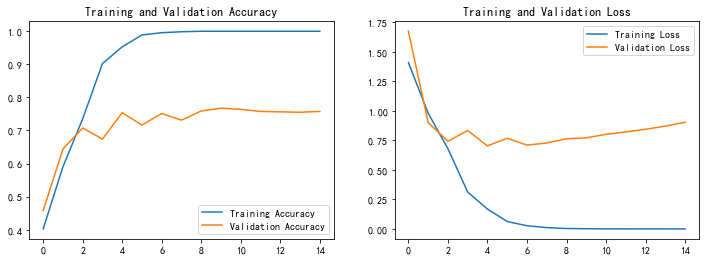

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 2. 混淆矩阵

Seaborn 是一个画图库，它基于 Matplotlib 核心库进行了更高阶的 API 封装，可以让你轻松地画出更漂亮的图形。Seaborn 的漂亮主要体现在配色更加舒服、以及图形元素的样式更加细腻。

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

# 定义一个绘制混淆矩阵图的函数
def plot_cm(labels, predictions):
    
    # 生成混淆矩阵
    conf_numpy = confusion_matrix(labels, predictions)
    # 将矩阵转化为 DataFrame
    conf_df = pd.DataFrame(conf_numpy, index=class_names ,columns=class_names)  
    
    plt.figure(figsize=(8,7))
    sns.heatmap(conf_df, annot=True, fmt="d", cmap="BuPu")
    plt.title('混淆矩阵',fontsize=15)
    plt.ylabel('真实值',fontsize=14)
    plt.xlabel('预测值',fontsize=14)

In [18]:
val_pre   = []
val_label = []

for images, labels in val_ds:#这里可以取部分验证数据（.take(1)）生成混淆矩阵
    for image, label in zip(images, labels):
        # 需要给图片增加一个维度
        img_array = tf.expand_dims(image, 0) 
        # 使用模型预测图片中的人物
        prediction = model.predict(img_array)

        val_pre.append(class_names[np.argmax(prediction)])
        val_label.append(class_names[label])

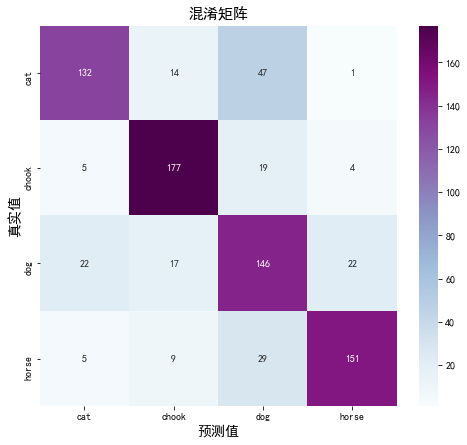

In [19]:
plot_cm(val_label, val_pre)

# 八、保存and加载模型

这是最简单的模型保存与加载方法哈

In [20]:
# 保存模型
model.save('model/24_model.h5')

c:\users\administrator\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [21]:
# 加载模型
new_model = tf.keras.models.load_model('model/24_model.h5')

***

**未完～**

**持续更新欢迎 点赞👍、收藏⭐、关注👀**

- 点赞👍：点赞给我持续更新的动力
- 收藏⭐️：收藏后你能够随时找到文章
- 关注👀：关注我第一时间接收最新文章